In this notebook,tried to analyze country profiling data using various clustering techniques. The following four types of unsupervised techniques are used:

PCA Decomposition (Dimensionality Reduction)    

K-Means Clustering (Centroid Based) Clustering    

Hierarchical (Divisive and Agglomerative) Clustering   

DBSCAN (Density Based) Clustering


### Importing Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [2]:
# lets check data 

data = pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
data.shape

(167, 10)

In [4]:
data.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [5]:
data.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

### Analyzig data 

In [6]:
# Data analysis baseline library
! pip install dabl

We are using Data Analysis Baseline Library here. It will help us analyze the data with respect to the target column.

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='gdpp', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=9.78E-01'}, xlabel='income', ylabel='gdpp'>,
         <AxesSubplot: title={'center': 'F=-8.76E-01'}, xlabel='child_mort'>,
         <AxesSubplot: title={'center': 'F=8.51E-01'}, xlabel='life_expec'>,
         <AxesSubplot: title={'center': 'F=-7.31E-01'}, xlabel='total_fer'>],
        [<AxesSubplot: title={'center': 'F=4.72E-01'}, xlabel='exports', ylabel='gdpp'>,
         <AxesSubplot: title={'center': 'F=-3.96E-01'}, xlabel='inflation'>,
         <AxesSubplot: title={'center': 'F=2.87E-01'}, xlabel='health'>,
         <AxesSubplot: title={'center': 'F=-2.03E-04'}, xlabel='imports'>]],
       dtype=object),
 None]

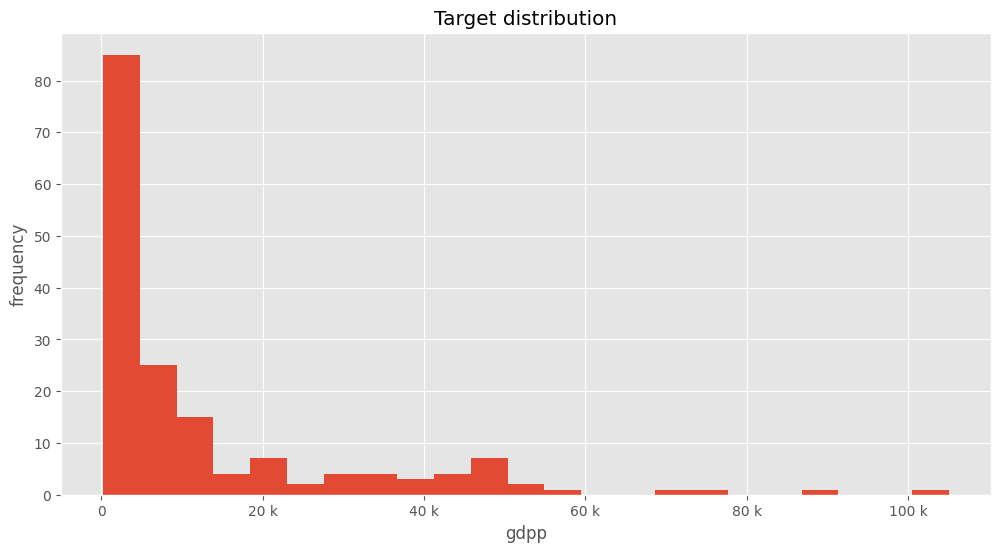

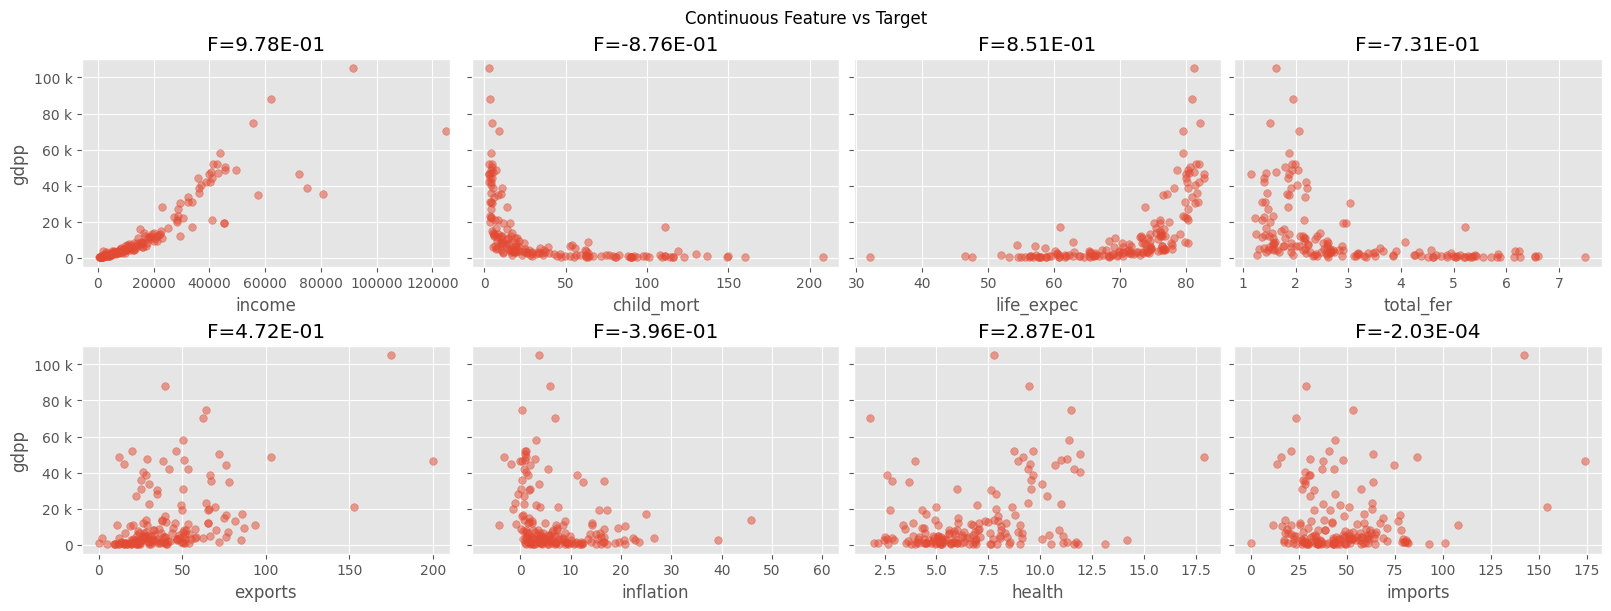

In [7]:
import dabl 
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,6)
dabl.plot(data, target_col='gdpp')

We can observe very close positive correlation between "Income" and "GDPP". Also, "Exports", "Imports", "Health" have sort of positive correlation with "GDPP".

However, we will now drop the column "Country" not because it is the only categorical (object type) parameter, but because it is not a deciding parameter to keep/not-keep a particular record within a cluster. In short, "Country" is a feature which is not required here for unsupervised learning.

In [8]:
# dropping country column

data = data.drop('country',axis=1)

In [9]:
%%javascript
Ipython.OutputArea.prototype._should_scroll = Function() {
    return False;
}

<IPython.core.display.Javascript object>

We will use simple profile reporting where we can get an easy overview of variables, and we can explore interactions (pair-wise scatter plots), correlations (Pearson's, Spearman's, Kendall's, Phik), missing value information - all in one place. The output it produces is a bit long though, and we need to scroll down and toggle different tabs to view all the results, but the time you spend on it is worth it.

In [10]:
! pip install pandas_profiling


In [11]:
# Pandas-profiling is an open source library that can generate beautiful interactive reports for any data set
import pandas_profiling as profile           
profile.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1.1 Gist of Overview:

Average death of children under age 5 in every 100 people: 38.27  

Average life expectancy: 70.56 (highly negatively skewed distribution) 

Health has a perfectly symmetric distribution with mean 6.82 

Average exports of goods and services per capita: 41.11   

Average imports of goods and services per capita: 46.89 (which is > avg. exports)    

Average net income per person: 17144.69 (highly positively skewed distribution)     

Average inflation: 7.78 (has a wide spread ranging from min -4.21 till +104)     

Average GDP per capita: 12964.15 (highly negatively skewed distribution)


1.2 Gist of Interactions:

Child Mortality has a perfect negative correlation with Life Expectancy  

Total Fertility has somewhat positive correlation with Child Mortality  

Exports and Imports have rough positive correlation
Income and GDPP have fairly positive correlation



1.3 Gist of Missing Values:  

There is no missing value in data

<AxesSubplot: >

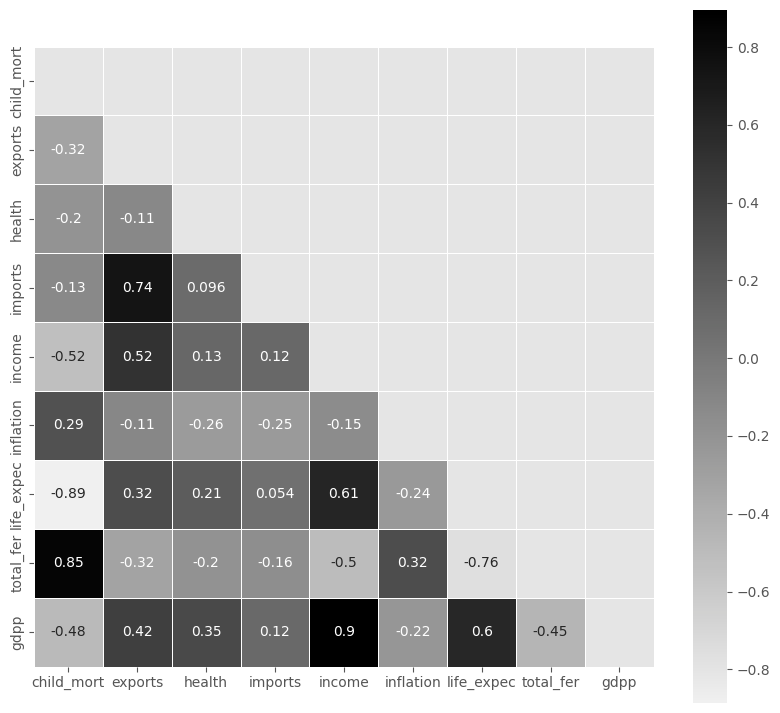

In [12]:
# Correlation plot 

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.light_palette('black',as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True,
            linewidths=.5, cbar_kws={"shrink": .9})

Insights from Pearson's Correlation Coefficient Plot :

Imports have high positive correlation with Exports (+0.74)  

Income has fairly high positive correlation with Exports (+0.52)   

Life Expectancy has fairly high positive correlation with Income (+0.61)    

Total Fertility has very high positive correlation with Child Mortality (+0.85)    

GDPP has very high positive correlation with Income (+0.90)   

GDPP has fairly high positive correlation with Life Expectancy (+0.60)   

Total Fertility has fairly high negative correlation with Life Expectancy (-0.76) - Well, I found this particular thing as an interesting insight but let's not forget "Correlation does not imply causation"!

## 1  PCA 

Principal Component Analysis (PCA) is a popular technique for deriving a set of low dimensional features from a large set of variables. Sometimes reduced dimensional set of features can represent distinct no. of groups with similar characteristics. Hence PCA can be an insightful clustering tool (or a preprocessing tool before applying clustering as well)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data)

In [14]:
from sklearn.decomposition import PCA
pc = PCA(svd_solver = 'auto')
pc.fit(data_scaled)
print('Total no. of principle components =', pc.n_components_)

Total no. of principle components = 9


In [15]:
print('principle component matrix :', pc.components_)

principle component matrix : [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.025

Let us check the amount of variance explained by each principal component here. They will be arranged in decreasing order of their explained variance ratio.

In [16]:
# the amount of varience that each pc explains

var = pc.explained_variance_ratio_
var

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Explained varience Ratio')

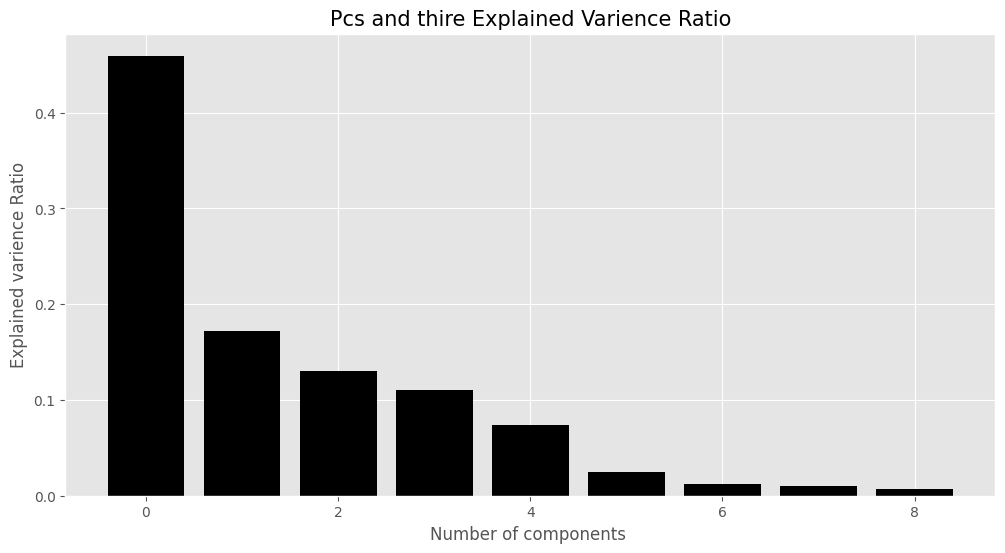

In [17]:
# plotting explained varience ratio for each PC

plt.bar([i for i, _ in enumerate(var)],var,color = 'black')
plt.title('Pcs and thire Explained Varience Ratio', fontsize =15)
plt.xlabel('Number of components ', fontsize = 12)
plt.ylabel('Explained varience Ratio', fontsize = 12)

In [18]:
# Cumulative varience explained by each PC

cum_var = np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)* 100)
print(cum_var)

[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


Using these cumulative variance ratios for all PCs, we will now draw a scree plot. It is used to determine the number of principal components to keep in this principal component analysis.

Text(0, 0.5, 'Cumulative Explained varince ration')

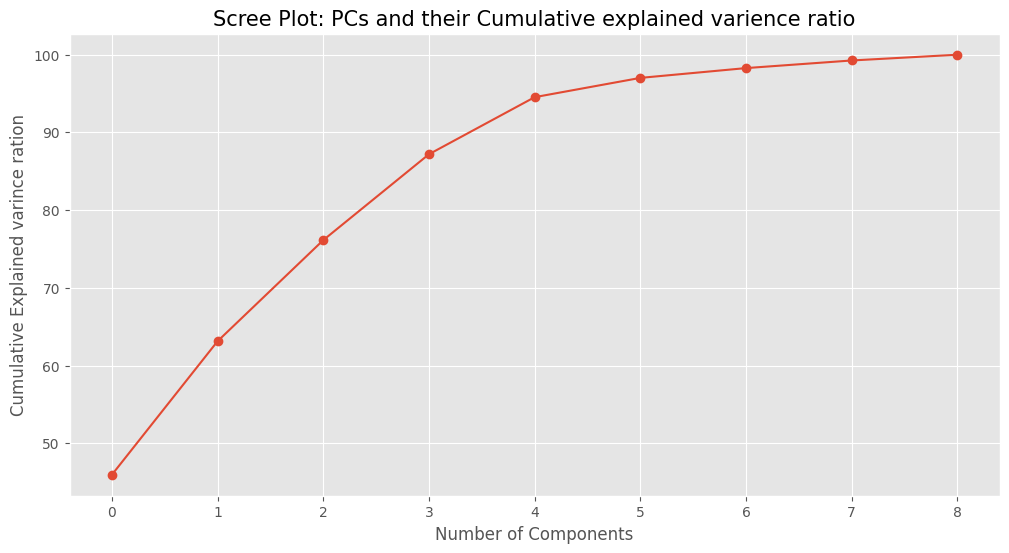

In [19]:
# Scree plot

plt.plot(cum_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative explained varience ratio',fontsize=15)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained varince ration',fontsize=12)


In [20]:
#Principal Component Data Decomposition
colnames = list(data.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pc.components_[0],'PC2':pc.components_[1],'PC3':pc.components_[2],
                          'PC4':pc.components_[3],'PC5':pc.components_[4], 'PC6':pc.components_[5], 'PC7':pc.components_[6], 
                          'PC8':pc.components_[7], 'PC9':pc.components_[8]})
pca_data

Features       PC1       PC2       PC3       PC4       PC5       PC6  \
0  child_mort -0.419519  0.192884 -0.029544  0.370653 -0.168970  0.200628   
1     exports  0.283897  0.613163  0.144761  0.003091  0.057616 -0.059333   
2      health  0.150838 -0.243087 -0.596632  0.461897  0.518000  0.007276   
3     imports  0.161482  0.671821 -0.299927 -0.071907  0.255376 -0.030032   
4      income  0.398441  0.022536  0.301548  0.392159 -0.247150  0.160347   
5   inflation -0.193173 -0.008404  0.642520  0.150442  0.714869  0.066285   
6  life_expec  0.425839 -0.222707  0.113919 -0.203797  0.108220 -0.601127   
7   total_fer -0.403729  0.155233  0.019549  0.378304 -0.135262 -0.750689   
8        gdpp  0.392645 -0.046022  0.122977  0.531995 -0.180167  0.016779   

        PC7       PC8       PC9  
0 -0.079489 -0.682743  0.327542  
1 -0.707303 -0.014197 -0.123082  
2 -0.249831  0.072497  0.113088  
3  0.592190 -0.028946  0.099037  
4  0.095562  0.352624  0.612982  
5  0.104633 -0.011538 -0.025236  
6  0.018486 -0.504664  0.294040  
7  0.028826  0.293353 -0.026336  
8  0.242998 -0.249696 -0.625646

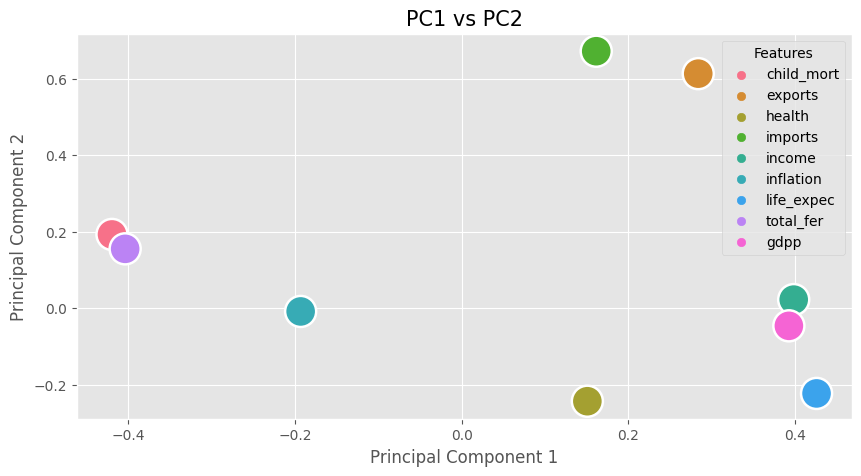

In [21]:
#Visualize 2 main PCs
fig = plt.figure(figsize = (10,5))
sns.scatterplot(x=pca_data.PC1, y=pca_data.PC2,hue=pca_data.Features,marker='o', s=500)
plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()


## (2) K-Means Clustering
This is the most popular method of clustering. It uses Euclidean distance between clusters in each iteration to decide a data point should belong to which cluster, and proceed accordingly. To decide how many no. of clusters to consider, we can employ several methods. The basic and most widely used method is Elbow Curve.

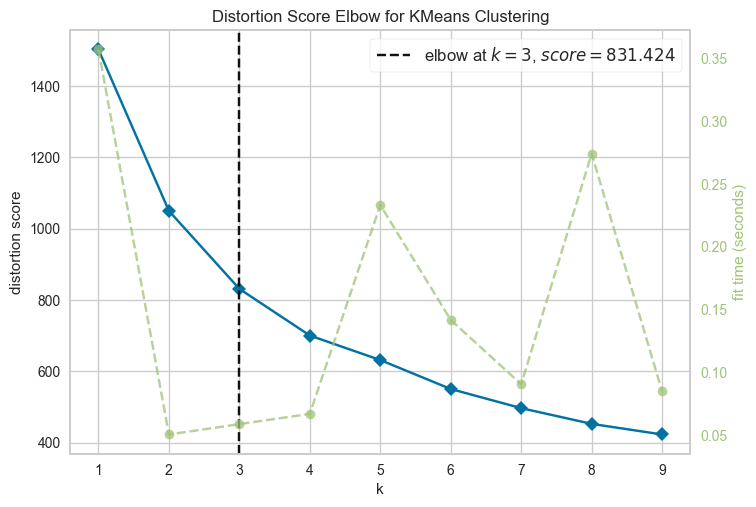

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
#Plotting Elbow Curve
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scaled)    
visualizer.poof()



In [23]:
# fittting data into K-Means model with 3 clusters 
km_3 = KMeans(n_clusters=3, random_state=12345)
km_3.fit(data_scaled)
print(km_3.cluster_centers_)

[[-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]


In [24]:
print(km_3.labels_)

[1 0 0 1 0 0 0 2 2 0 0 2 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


We can see each record has got a label among 0,1,2. This label is each of their cluster_id i.e. in which cluster they belong to. We can count the records in each cluster now.

In [25]:
pd.Series(km_3.labels_).value_counts()

0    84
1    47
2    36
dtype: int64

We see, the highest no. of records belong to the first cluster.

Now, we are interested to check how good is our K-Means clustering model. Silhouette Coefficient is one such metric to check that. The Silhouette Coefficient is calculated using:

the mean intra-cluster distance ( a ) for each sample  

the mean nearest-cluster distance ( b ) for each sample   

The Silhouette Coefficient for a sample is (b - a) / max(a, b)

In [26]:
# calculate silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(data_scaled, km_3.labels_)

0.28329575683463126

In [27]:
# calculate SC for K=2 through K=10
k_range = range(2,10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=12345)
    km.fit(data_scaled)
    scores.append(metrics.silhouette_score(data_scaled, km.labels_))

In [28]:
print(scores)

[0.28735668921406704, 0.28329575683463126, 0.301375962376881, 0.3065522876043576, 0.23300198114343365, 0.24738238438751395, 0.25598761482022847, 0.22932623686380524]


We observe the highest silhouette score with no. of clusters 3 and 4. However, from Elbow Curve, we got to see the "knee" like bent at no. of clusters 3. So we will do further analysis to choose the ideal no. of clusters between 3 and 4.

Method-2: Plotting of SSE, Davies-Bouldin Scores, Silhouette Scores to Decide Ideal No. of Clusters

In [29]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
sse, db,slc = {},{},{}
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=12345).fit(data_scaled)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_   # Inertia : sum of distance of samples to thire closest cluster center
    db[k] = davies_bouldin_score(data_scaled,clusters)
    slc[k] = silhouette_score(data_scaled,clusters)

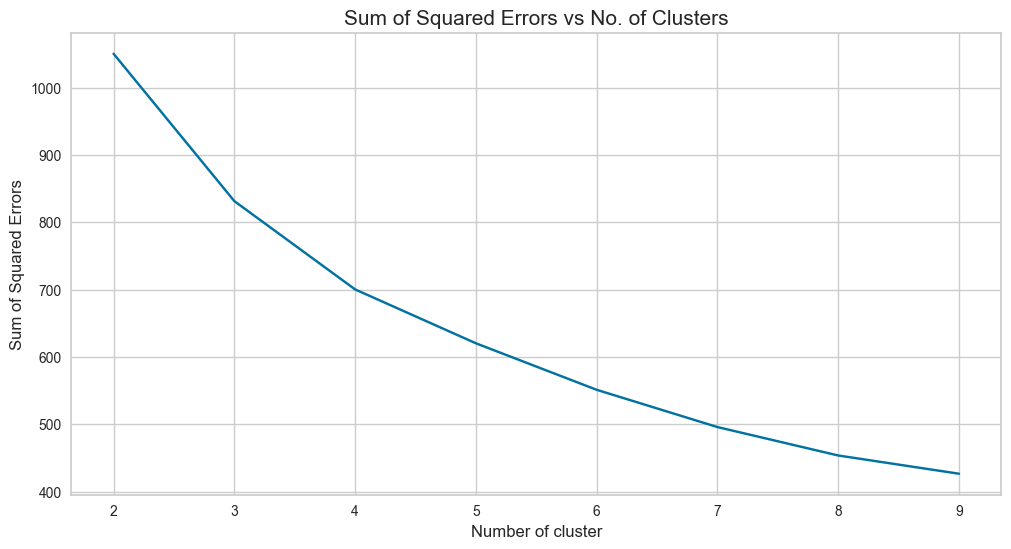

In [30]:
# Plotting SSE
plt.figure(figsize=(12,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Sum of Squared Errors", fontsize=12)
plt.title("Sum of Squared Errors vs No. of Clusters", fontsize=15)
plt.show()

We can see "knee" like bent at both 3 and 4, still considering no. of clusters = 4 seems a better choice, because after 4, there is no further "knee" like bent observed. Still, we will analyse further to decide between 3 and 4.

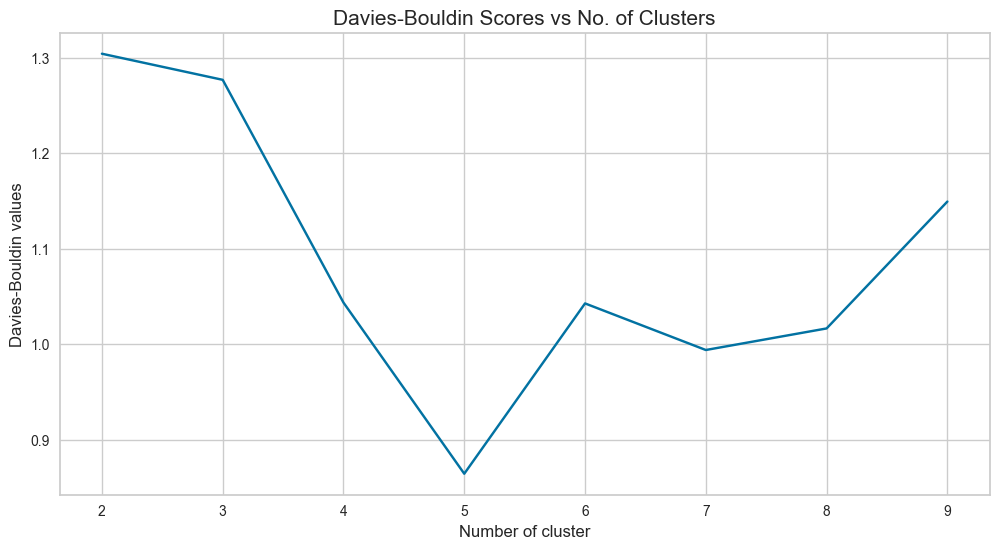

In [31]:
#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

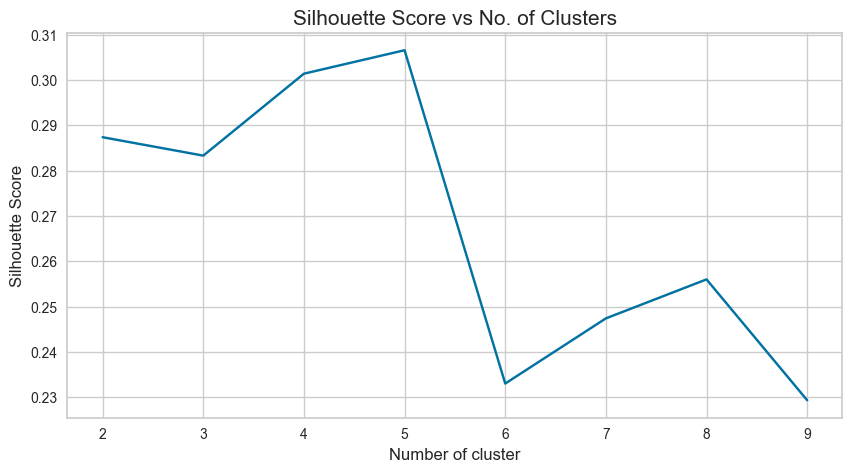

In [32]:
# Silhouette Plots for Different No. of Clusters 
plt.figure(figsize=(10,5))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs No. of Clusters", fontsize=15)
plt.show()

In [33]:
preds = km_3.labels_
data_df = pd.DataFrame(data)
data_df['KM_Clusters'] = preds 
data_df.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  KM_Clusters  
0       5.82    553            1  
1       1.65   4090            0  
2       2.89   4460            0  
3       6.16   3530            1  
4       2.13  12200            0  
5       2.37  10300            0  
6       1.69   3220            0  
7       1.93  51900            2  
8       1.44  46900            2  
9       1.92   5840            0

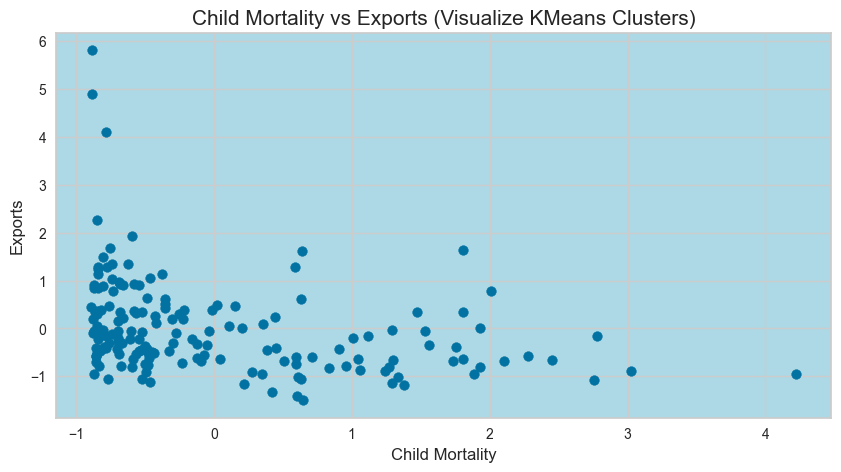

In [34]:
# visualize clusters: feature pair-1
import matplotlib.pyplot as plt_1
plt_1.rcParams['axes.facecolor'] = 'lightblue'
plt_1.figure(figsize=(10,5))
plt_1.scatter(data_scaled[:,0], data_scaled[:,1])#c=cluster_labels) #child mortality vs exports
plt_1.title("Child Mortality vs Exports (Visualize KMeans Clusters)", fontsize=15)
plt_1.xlabel("Child Mortality", fontsize=12)
plt_1.ylabel("Exports", fontsize=12)
plt_1.rcParams['axes.facecolor'] = 'lightblue'
plt_1.show()

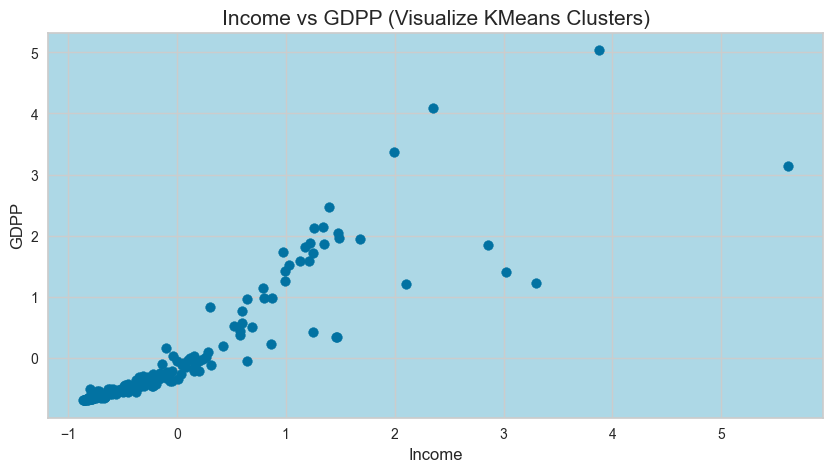

In [35]:
#Visualize clusters: Feature Pair-2
plt_1.figure(figsize=(10,5))
plt_1.scatter(data_scaled[:,4],data_scaled[:,8]) # income vs gdpp
plt_1.title("Income vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt_1.xlabel("Income", fontsize=12)
plt_1.ylabel("GDPP", fontsize=12)
plt_1.rcParams['axes.facecolor'] = 'lightblue'
plt_1.show()

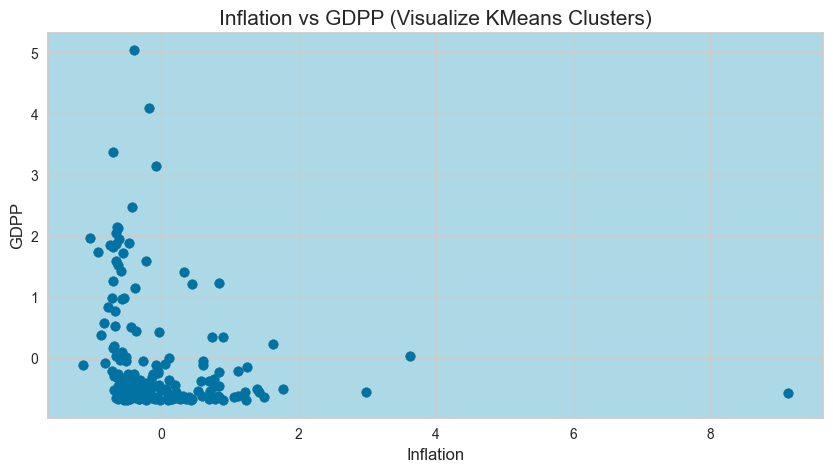

In [36]:
#Visualize clusters: Feature Pair-3
plt_1.figure(figsize=(10,5))
plt_1.scatter(data_scaled[:,5],data_scaled[:,8]) # inflation vs gdpp
plt_1.title("Inflation vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt_1.xlabel("Inflation", fontsize=12)
plt_1.ylabel("GDPP", fontsize=12)
plt_1.rcParams['axes.facecolor'] = 'lightblue'
plt_1.show()

In [37]:
# Export KMeans result to file
data_df.to_csv("KMeans_results.csv", index=False)

### (3) Hierarchical Clustering¶
There are two types of hierarchical clustering: Divisive and Agglomerative. In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on. In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by dendrogram.

Method -1 : Dendogram Plotting Using Clustermap

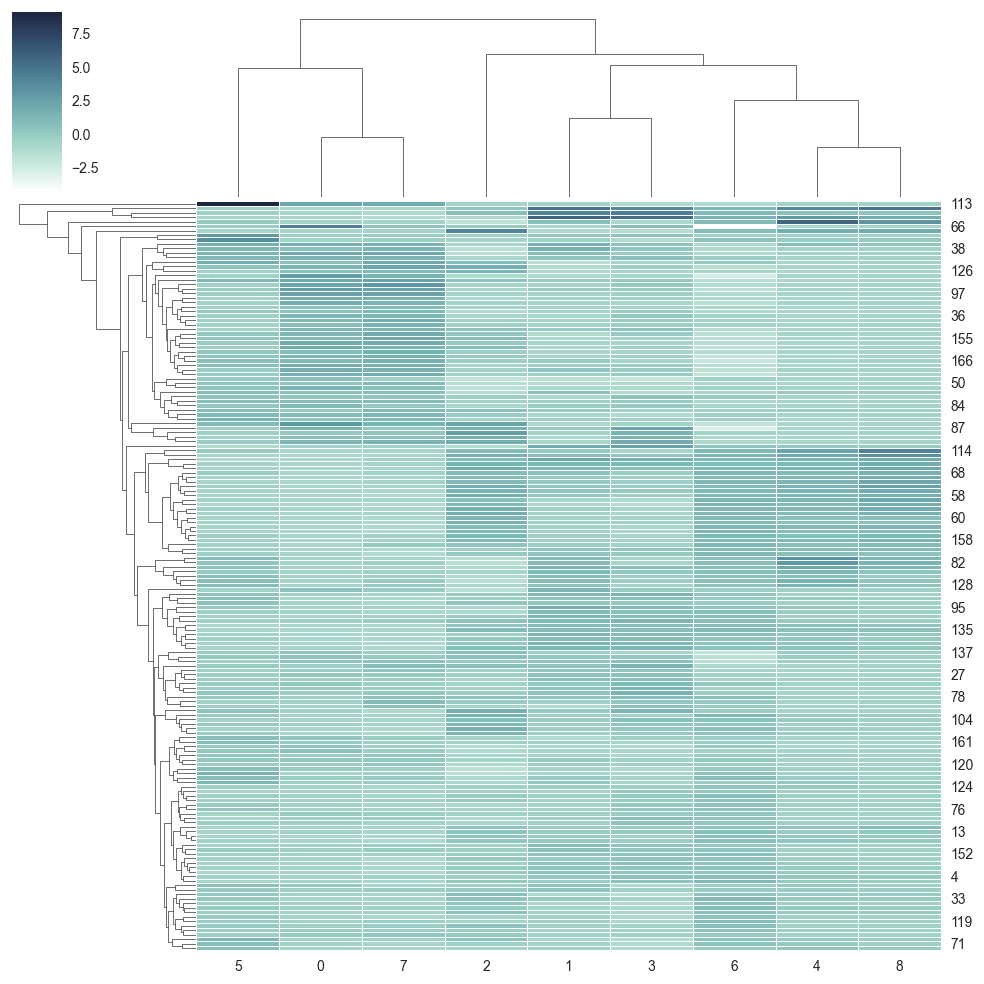

In [38]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(data_scaled, cmap=cmap, linewidths=.5)


From above dendrogram, we can consider 2 clusters at minimum or 6 clusters at maximum. We will again cross-check the dendrogram using Ward's Method. Ward's method is an alternative to single-link clustering. This algorithm works for finding a partition with small sum of squares (to minimise the within-cluster-variance).

Method-2 : Dendogram Plotting using Ward's Method

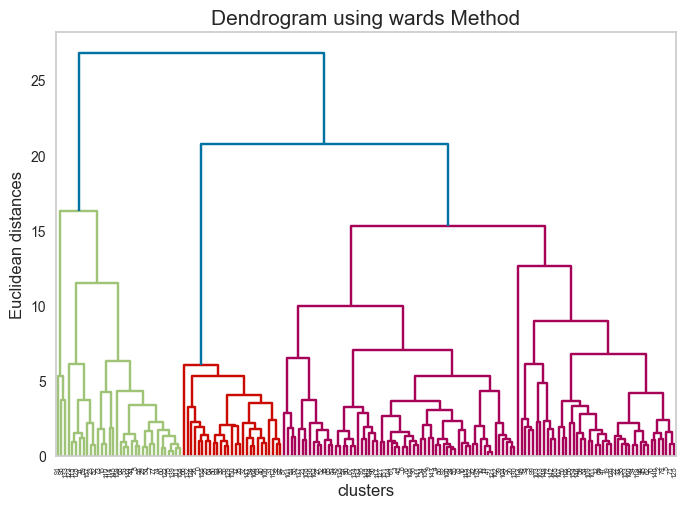

In [39]:
# using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch 
plt.rcParams['axes.facecolor']= 'white'
plt.rcParams['axes.grid'] = False
dendogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram using wards Method", fontsize=15)
plt.xlabel('clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False   
plt.show()

We can see 3 prominent clusters here (Blue, purple, black). We will now follow the similar process of labelling data with cluster ids, then visualize the 3 clusters using various feature pairs, and finally we will export the results to a .csv file.

In [40]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(data_scaled)

In [41]:
Y_hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [42]:
hcpreds = hc.labels_
data_hc_df = data.drop('KM_Clusters', axis=1)
data_hc_df['Hier_Clusters'] = hcpreds
data_hc_df.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  Hier_Clusters  
0       5.82    553              2  
1       1.65   4090              1  
2       2.89   4460              1  
3       6.16   3530              1  
4       2.13  12200              1  
5       2.37  10300              1  
6       1.69   3220              1  
7       1.93  51900              0  
8       1.44  46900              0  
9       1.92   5840              1

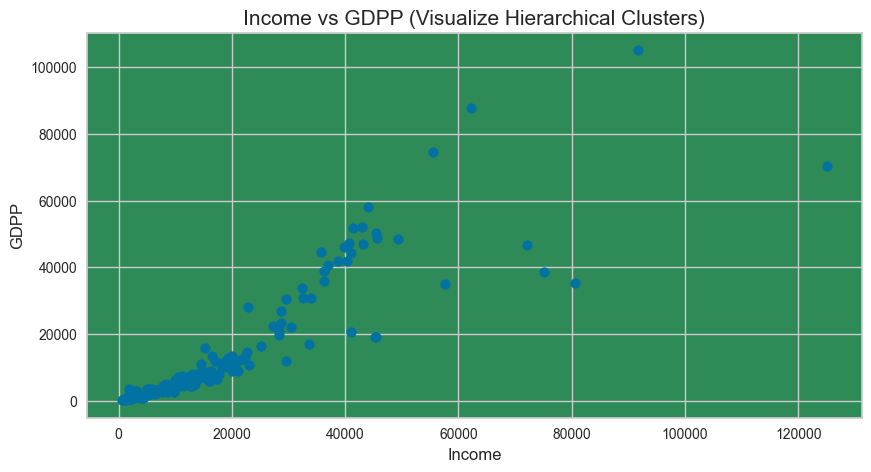

In [43]:
#Visualize clusters: Random Feature Pair-1 (income vs gdpp)
import matplotlib.pyplot as plt_2
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.rcParams['axes.grid'] = True
plt_2.figure(figsize=(10,5))
#datahc_df = pd.DataFrame(data_hc_df)
plt_2.scatter(data_hc_df['income'],data_hc_df['gdpp']) 
plt_2.title('Income vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt_2.xlabel("Income", fontsize=12)
plt_2.ylabel("GDPP", fontsize=12)
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.rcParams['axes.grid'] = True
plt_2.show()

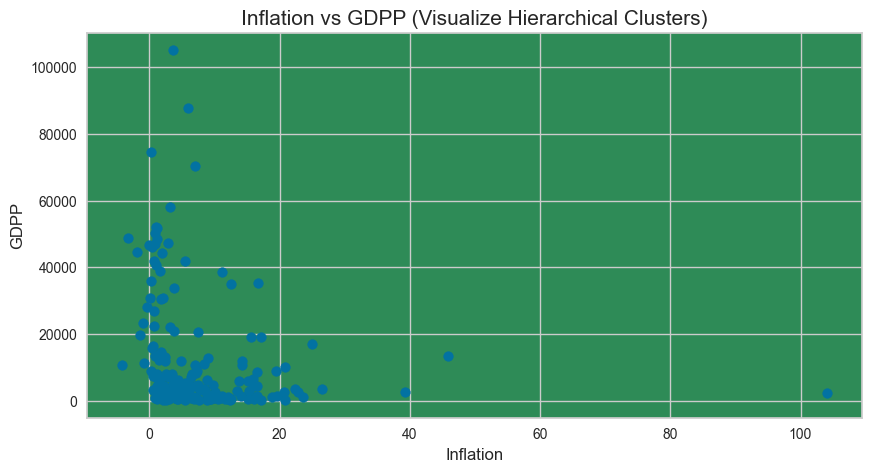

In [44]:
#Visualize clusters: Random Feature Pair-2 (inflation vs gdpp)
plt_2.figure(figsize=(10,5))
plt_2.scatter(data_hc_df['inflation'],data_hc_df['gdpp']) 
plt_2.title('Inflation vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt_2.xlabel("Inflation", fontsize=12)
plt_2.ylabel("GDPP", fontsize=12)
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.show()

For this pair, the plot looks similar to what we had got earlier for the KMeans. Also, observing minutely both KMeans clustering's "Inflation vs GDPP" plot and hierarchical clustering's "Inflation vs GDPP" plot, we find almost no difference in assigning cluster labels for all data points.

In [45]:
# Export hierarchical clustering results
data_hc_df.to_csv('Hierchical_results.csv', index=False)

### (4) DBSCAN Clustering
DBSCAN is an abbreviation of "Density-based spatial clustering of applications with noise". This algorithm groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks noise as outliers (noise means the points which are in low-density regions).

I found an interesting result with DBSCAN when I used all features of country data. It gave me a single cluster. I presume, that was very evident to happen because our data is almost evenly spread, so density wise, this algorithm could not bifurcate the datapoints into more than one cluster. Hence, I used only the features which have high correlation with "GDPP". I also kept "Child Mortality" and "Total Fertility" in my working dataset since they have polarizations - some data points have extremely high values, some have extremely low values (ref. to corresponding scatter plots in data profiling section in the beginning).

In [46]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#data['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
# A sample of clusters
print(data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].head())

# number of labels
print("number of labels: ", set(labels))

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  
number of labels:  {0, 1, 2, 3, 4, 5, -1}


We have got 7 clusters using density based clustering which is a distinct observation (7 is much higher than 3 which we got in all three different clustering algorithms we used earlier).

In [47]:
db.labels_

array([ 0,  1, -1, -1,  1, -1,  1,  2,  2, -1,  1, -1, -1,  1, -1, -1,  1,
        3,  1,  1,  1, -1,  1, -1,  1,  3, -1,  1,  3,  2,  1, -1,  5,  1,
        1,  1,  4, -1, -1,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1, -1,
        1,  1,  2,  2, -1,  4,  1,  2, -1,  2,  1,  1,  0,  3,  1, -1,  1,
        2, -1, -1,  1, -1, -1, -1,  2,  1,  2, -1, -1,  4, -1, -1,  1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  4,  0, -1,  1,  5, -1, -1,  1, -1,
       -1, -1,  1,  1,  0, -1, -1, -1, -1,  2,  5, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  2, -1,  1,  1, -1, -1, -1,  4,  1, -1, -1, -1,  1,  1,
       -1, -1,  1,  2, -1,  1, -1,  1,  2, -1, -1,  0, -1, -1, -1, -1,  1,
        1, -1,  0, -1, -1,  2, -1,  1, -1,  1, -1, -1, -1,  0],
      dtype=int64)

In [48]:
pd.Series(db.labels_).value_counts()

-1    72
 1    59
 2    16
 0     8
 4     5
 3     4
 5     3
dtype: int64

We can Spot 78.44% data points have been labelled to the 1 st and 2 nd clusters.

In [49]:
#save the cluster labels and sort by cluster
datacopy = data.copy()
datacopy = datacopy.drop('KM_Clusters', axis=1)
datacopy['DB_cluster'] = db.labels_

In [50]:
# review the cluster centers
datacopy.groupby('DB_cluster').mean()

child_mort    exports     health    imports        income  \
DB_cluster                                                              
-1           46.255556  47.222208   6.458889  50.771749  19736.819444   
 0           92.212500  27.250000   6.315000  37.637500   1793.500000   
 1           17.598305  41.357627   6.705593  48.840678  13724.237288   
 2            4.125000  33.393750  10.219375  32.775000  37312.500000   
 3          112.250000  20.025000   6.117500  32.250000   1825.000000   
 4           71.940000  22.180000   4.876000  42.260000   1824.000000   
 5          136.666667  27.266667   4.890000  42.566667   1538.000000   

            inflation  life_expec  total_fer          gdpp  
DB_cluster                                                  
-1          12.471653   68.591667   3.209861  13849.277778  
 0          10.565000   55.775000   5.535000    757.000000  
 1           4.209559   74.161017   2.082881   8358.576271  
 2           1.371125   81.006250   1.720000  41237.500000  
 3           3.143750   58.150000   5.347500    797.500000  
 4           4.180000   63.800000   4.898000    742.200000  
 5           4.436667   58.266667   6.876667    651.000000

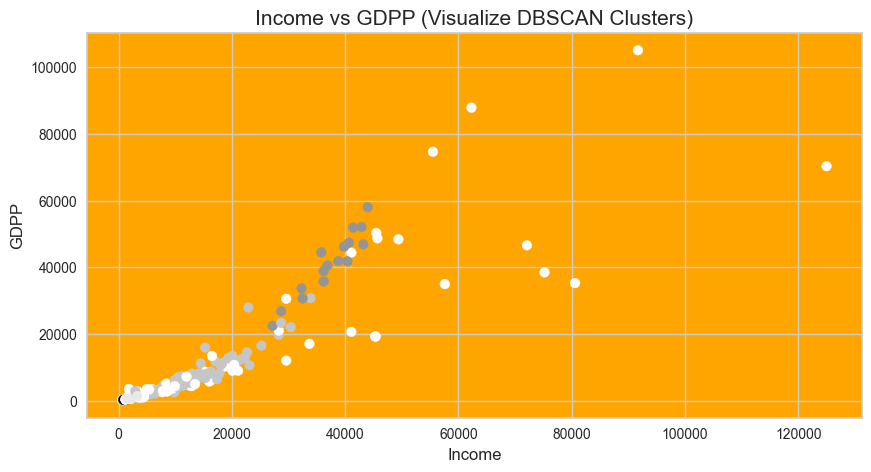

In [51]:
#Visualize clusters: Random Feature Pair-1 (income vs gdpp)
import matplotlib.pyplot as plt_3
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.figure(figsize=(10,5))
plt_3.scatter(datacopy['income'],datacopy['gdpp'],c=db.labels_) 
plt_3.title('Income vs GDPP (Visualize DBSCAN Clusters)', fontsize=15)
plt_3.xlabel("Income", fontsize=12)
plt_3.ylabel("GDPP", fontsize=12)
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.show()

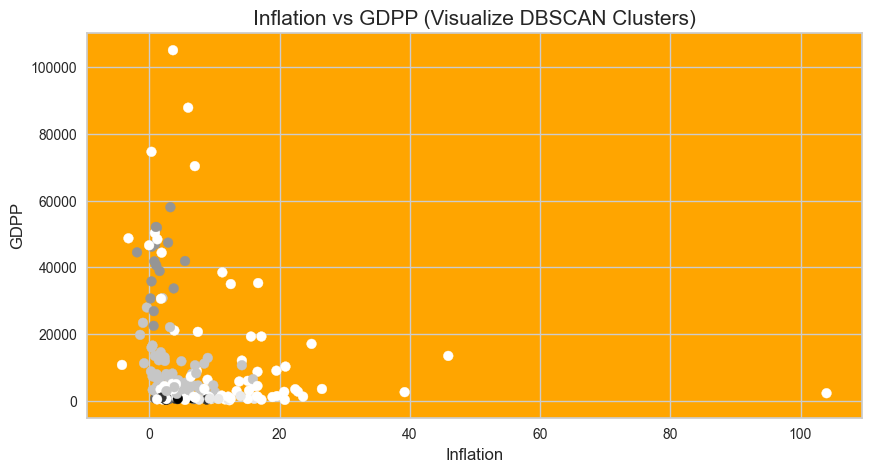

In [52]:
#Visualize clusters: Random Feature Pair-2 (inflation vs gdpp)
import matplotlib.pyplot as plt_3
plt_3.figure(figsize=(10,5))
plt_3.scatter(datacopy['inflation'],datacopy['gdpp'],c=db.labels_) 
plt_3.title('Inflation vs GDPP (Visualize DBSCAN Clusters)', fontsize=15)
plt_3.xlabel("Inflation", fontsize=12)
plt_3.ylabel("GDPP", fontsize=12)
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.show()


In both of the above plots, we can well observe the prevalence of two clusters (1st and 2nd) only.

In [53]:
# data with labelled cluster_ids
datacopy.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  DB_cluster  
0       5.82    553           0  
1       1.65   4090           1  
2       2.89   4460          -1  
3       6.16   3530          -1  
4       2.13  12200           1  
5       2.37  10300          -1  
6       1.69   3220           1  
7       1.93  51900           2  
8       1.44  46900           2  
9       1.92   5840          -1

In [54]:
#Export DBSCAN results
datacopy.to_csv('DBSCAN_results.csv', index=False)